In [2]:
import pandas as pd

eng_bus_repair_df = pd.read_csv('eng_bus_repair.csv')
unique_feeder_info_df = pd.read_csv('unique_feeder_info.csv')

unique_veh_ids = unique_feeder_info_df['VEH_ID'].unique()

filtered_df = eng_bus_repair_df[eng_bus_repair_df['br_busno'].isin(unique_veh_ids)]

filtered_df.to_csv('filtered_eng_bus_repair.csv', index=False)




C:\Users\shake\AppData\Local\Temp\ipykernel_23532\206075389.py:3: DtypeWarning: Columns (15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  eng_bus_repair_df = pd.read_csv('eng_bus_repair.csv')


In [3]:

filtered_df = pd.read_csv('filtered_eng_bus_repair.csv')

filtered_df['br_date_entry'] = pd.to_datetime(filtered_df['br_date_entry'])
filtered_df['br_target_completed'] = pd.to_datetime(filtered_df['br_target_completed'])


filtered_df_2023 = filtered_df[(filtered_df['br_date_entry'].dt.year == 2023) & (filtered_df['br_target_completed'].dt.year == 2023)]

waiting_for_parts = filtered_df_2023[filtered_df_2023['br_waiting_part'] == 'Yes']


In 2023, total maintenance entries:  11295


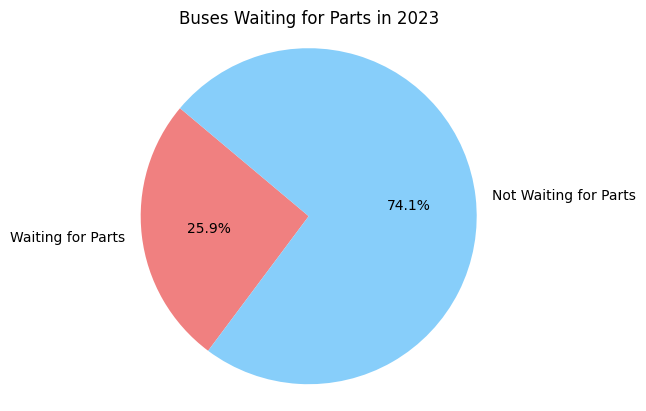

In [4]:
import matplotlib.pyplot as plt


waiting_count = len(waiting_for_parts)

print("In 2023, total maintenance entries: ",len(filtered_df_2023))


not_waiting_count = len(filtered_df_2023) - waiting_count


labels = ['Waiting for Parts', 'Not Waiting for Parts']
sizes = [waiting_count, not_waiting_count]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Buses Waiting for Parts in 2023')
plt.show()


In 2023, total maintenance entries:  30274


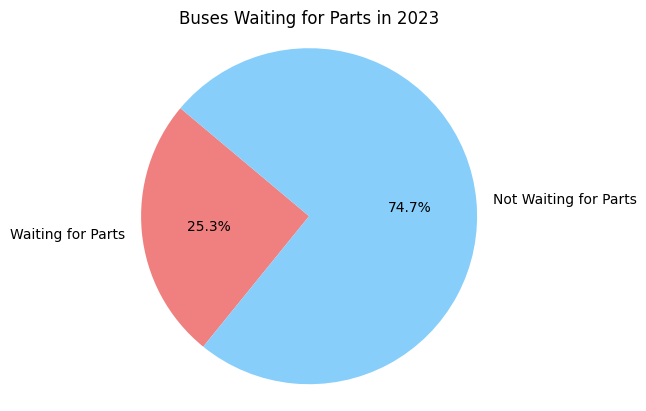

In [5]:
waiting_for_parts = filtered_df[filtered_df['br_waiting_part'] == 'Yes']

waiting_count = len(waiting_for_parts)

print("In 2023, total maintenance entries: ",len(filtered_df))


not_waiting_count = len(filtered_df) - waiting_count


labels = ['Waiting for Parts', 'Not Waiting for Parts']
sizes = [waiting_count, not_waiting_count]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Buses Waiting for Parts in 2023')
plt.show()

In [6]:

waiting_for_parts_df = filtered_df[filtered_df['br_waiting_part'] == 'Yes']


not_waiting_for_parts_df = filtered_df[filtered_df['br_waiting_part'] == 'No']


waiting_for_parts_df['maintenance_time_waiting'] = (waiting_for_parts_df['br_target_completed'] - waiting_for_parts_df['br_date_entry']).dt.days


not_waiting_for_parts_df['maintenance_time_not_waiting'] = (not_waiting_for_parts_df['br_target_completed'] - not_waiting_for_parts_df['br_date_entry']).dt.days


average_maintenance_time_waiting = waiting_for_parts_df['maintenance_time_waiting'].mean()


average_maintenance_time_not_waiting = not_waiting_for_parts_df['maintenance_time_not_waiting'].mean()


print(f'Average Maintenance Time for Buses Waiting for Parts: {average_maintenance_time_waiting:.2f} days')
print(f'Average Maintenance Time for Buses Not Waiting for Parts: {average_maintenance_time_not_waiting:.2f} days')


Average Maintenance Time for Buses Waiting for Parts: 50.68 days
Average Maintenance Time for Buses Not Waiting for Parts: 38.99 days


C:\Users\shake\AppData\Local\Temp\ipykernel_23532\3473897370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waiting_for_parts_df['maintenance_time_waiting'] = (waiting_for_parts_df['br_target_completed'] - waiting_for_parts_df['br_date_entry']).dt.days
C:\Users\shake\AppData\Local\Temp\ipykernel_23532\3473897370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_waiting_for_parts_df['maintenance_time_not_waiting'] = (not_waiting_for_parts_df['br_target_completed'] - not_waiting_for_parts_df['br_d